In [28]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### Implementation of Deepwalk algorithm

In [203]:
from random import shuffle, sample, random
random()

0.6474593600627504

In [224]:
def random_walk(graph, node, len_walk, alpha):
    walk = [node]
    for _ in range(len_walk-1):
        node = sample(list(graph.neighbors(node)), 1)[0]
        walk.append(node)
        if np.random.rand() < alpha:
            node = walk[0]
    return [str(node) for node in walk]

In [225]:
from gensim.models import Word2Vec

def skip_gram(walks, out_dim, win_size):
    model = Word2Vec(walks, size=out_dim, window=win_size, min_count=0, sg=1, hs=1)
    return model.wv

In [226]:
def deepwalk(graph, win_size, out_dim, n_walks, len_walk, alpha=0.8):
    """
    Args:
        graph (networkx.Graph): Input graph, with v vertices
        win_size (int): Window size
        out_dim (int): embedding size
        n_walks (int): walks per vertex
        len_walk (int): walk length

    Returns:
        np.array: Representation matrix of shape v x d
    """
    nb_nodes = graph.number_of_nodes()
    nodes = list(graph.nodes)
    repr_matrix = np.random.rand(nb_nodes, out_dim)
    
    walks = []    
    for i in range(n_walks):
        shuffle(nodes)
        for node in nodes:
            walks.append(random_walk(graph, node, len_walk, alpha))
    repr_matrix = skip_gram(walks, out_dim=out_dim, win_size=win_size)
    
    return repr_matrix

## Application to toy dataset

In [281]:
size = 200
adj_mat = np.random.randint(10, size=size*size).reshape((size, size))

In [282]:
G = nx.Graph()

In [283]:
G.clear()
G.add_nodes_from(range(adj_mat.shape[0]))
for i in range(adj_mat.shape[0]):
    for j in range(i, adj_mat.shape[0]):
        if adj_mat[i, j] == 0:
            G.add_edge(i, j)

In [284]:
for node in G.nodes:
    if len(list(G.neighbors(node))) > 20:
        G.nodes[node]['label'] = 1
    else:
        G.nodes[node]['label'] = 0

In [288]:
repr_mat_bfs = deepwalk(G, win_size=5, out_dim=2, n_walks=20, len_walk=10, alpha = 0.9)

In [289]:
repr_mat_dfs = deepwalk(G, win_size=5, out_dim=2, n_walks=20, len_walk=10, alpha = 0)

C:\Users\sbran\Anaconda3\envs\projet_recherche\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


Text(0.5, 1.0, 'Depth-first exploration (alpha = 0)')

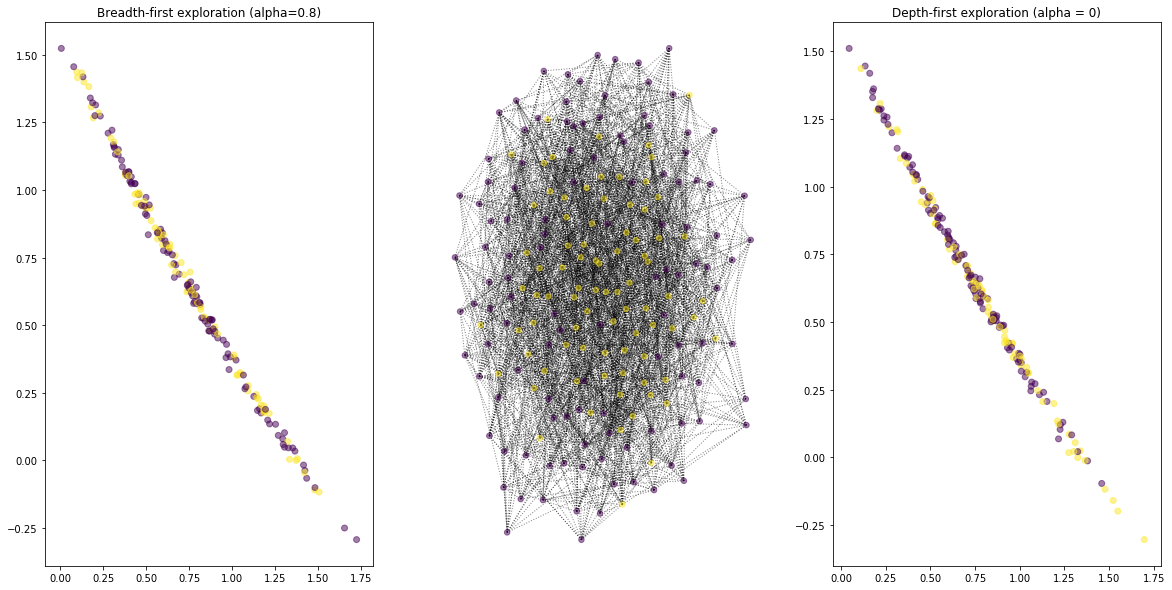

In [290]:
plt.figure(figsize=(20,10))

plt.subplot(131)
plt.scatter(repr_mat_bfs.vectors.T[0], repr_mat_bfs.vectors.T[1], c=[G.nodes[n]['label'] for n in G.nodes], alpha=0.5)
plt.title("Breadth-first exploration (alpha=0.8)")
plt.subplot(132)
nx.draw(G, node_size=30, node_color=[G.nodes[n]['label'] for n in G.nodes], alpha = 0.5, style ='dotted')
plt.subplot(133)
plt.scatter(repr_mat_dfs.vectors.T[0], repr_mat_dfs.vectors.T[1], c=[G.nodes[n]['label'] for n in G.nodes], alpha=0.5)
plt.title("Depth-first exploration (alpha = 0)")

## Application to Enzyme labelled dataset

In [322]:
G = nx.Graph()
G.add_nodes_from([str(n) for n in range(1,89)])

In [323]:
with open('./data/enzymes/ENZYMES8.edges') as fedge:
    edges = fedge.readlines()
for edge in edges:
    n1, n2 = edge.split(' ')
    n2 = n2[:-1]
    G.add_edge(n1, n2)

In [327]:
with open('./data/enzymes/ENZYMES8.node_labels') as flabels:
    labels = flabels.readlines()
for label in labels:
    node, label = label.split(' ')
    label = label[:-1]
    G.nodes[node]['label'] = label

C:\Users\sbran\Anaconda3\envs\projet_recherche\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


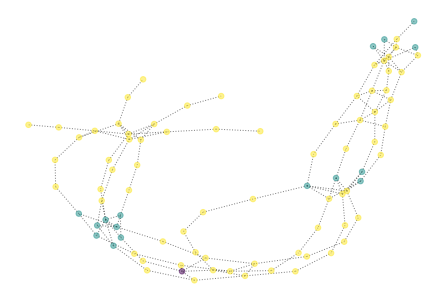

In [331]:
nx.draw(G, node_size=30, alpha = 0.5, style ='dotted', node_color=[int(G.nodes[node]['label']) if G.nodes[node]['label'] else 0 for node in G.nodes ])

In [341]:
repr_mat_bfs = deepwalk(G, win_size=3, out_dim=2, n_walks=10, len_walk=10, alpha = 1)

In [342]:
repr_mat_dfs = deepwalk(G, win_size=3, out_dim=2, n_walks=10, len_walk=10, alpha = 0)

Text(0.5, 1.0, 'Depth-first exploration (alpha = 0)')

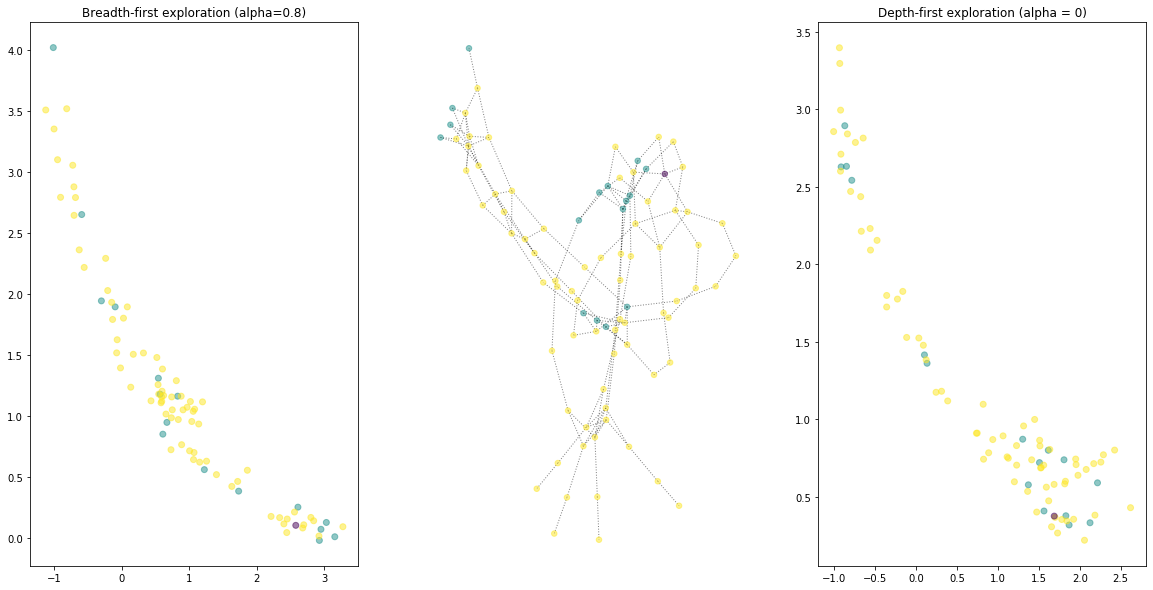

In [343]:
plt.figure(figsize=(20,10))

plt.subplot(131)
plt.scatter(repr_mat_bfs.vectors.T[0], repr_mat_bfs.vectors.T[1], alpha=0.5, c=[int(G.nodes[node]['label']) if G.nodes[node]['label'] else 0 for node in G.nodes ])
plt.title("Breadth-first exploration (alpha=0.8)")
plt.subplot(132)
nx.draw(G, node_size=30, alpha = 0.5, style ='dotted', node_color=[int(G.nodes[node]['label']) if G.nodes[node]['label'] else 0 for node in G.nodes ])
plt.subplot(133)
plt.scatter(repr_mat_dfs.vectors.T[0], repr_mat_dfs.vectors.T[1], alpha=0.5, c=[int(G.nodes[node]['label']) if G.nodes[node]['label'] else 0 for node in G.nodes ])
plt.title("Depth-first exploration (alpha = 0)")